#Task 4
## Classification with Logistic Regression


##Objective: Build a binary classifier using logistic regression





##Importing Libraries and Loading Data


In [ ]:
# Standardizing the feature set
# Splitting the dataset into training and testing sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# Reading dataset into a DataFrame
# Load data
data_frame = pd.read_csv("data.csv")

##Initial Data Exploration

In [ ]:
# Display the first few rows of the dataset
print(data_frame.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Check for missing values
print(data_frame.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Get basic statistics of the dataset
print(data_frame.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

### Data Cleaning


In [ ]:
# Drop unused columns
data_frame.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [ ]:
# Encode target variable: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

##Feature Selection

In [ ]:
# Features and target
X = data_frame.drop('diagnosis', axis=1)
y = df['diagnosis']

##Splitting Data into Train-Test Sets

In [ ]:
# Splitting the dataset into training and testing sets
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Standardizing the feature set
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Fitting a Logistic Regression Model

In [ ]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

##Evaluating the Model


In [ ]:
# Predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


ROC AUC Score: 0.9960


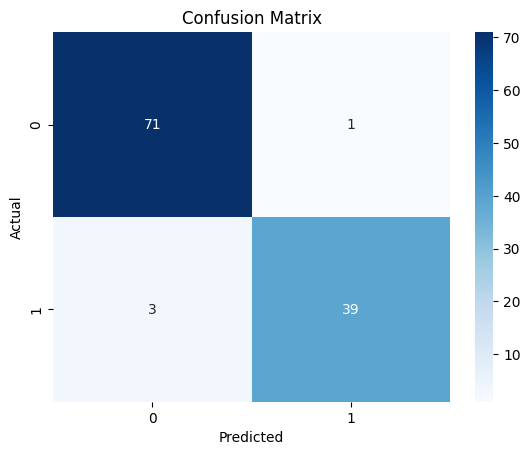

In [ ]:
# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


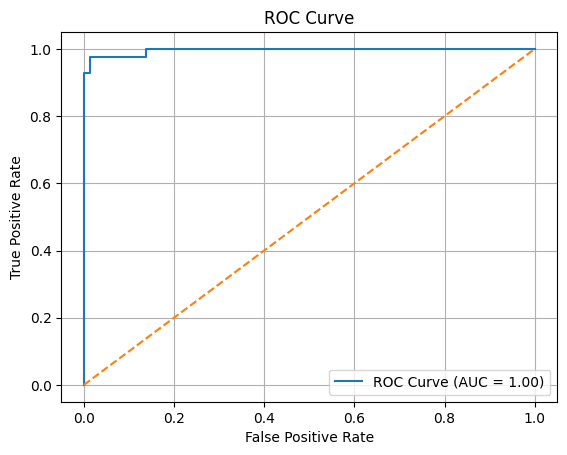

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Threshold Tuning



In [ ]:
custom_threshold = 0.3
y_pred_custom = (y_prob >= custom_threshold).astype(int)
print("\nConfusion Matrix with threshold=0.3:")
print(confusion_matrix(y_test, y_pred_custom))


Confusion Matrix with threshold=0.3:
[[71  1]
 [ 1 41]]


## Sigmoid Function Explanation


In [ ]:
# Logistic regression uses sigmoid to convert scores to probabilities:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


##Visualize Sigmoid Function

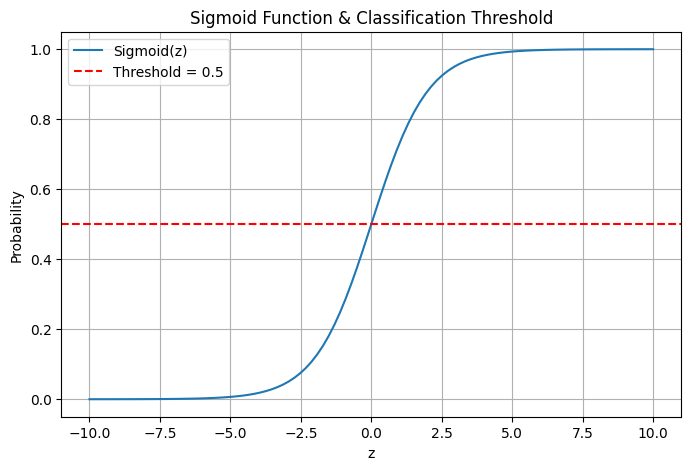

In [ ]:
# Example: visualize sigmoid function
z = np.linspace(-10, 10, 100)
s = sigmoid(z)
plt.figure(figsize=(8, 5))
plt.plot(z, s, label='Sigmoid(z)')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title('Sigmoid Function & Classification Threshold')
plt.xlabel('z')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## Visualize classification (Benign vs Malignant) using PCA for 2D plot

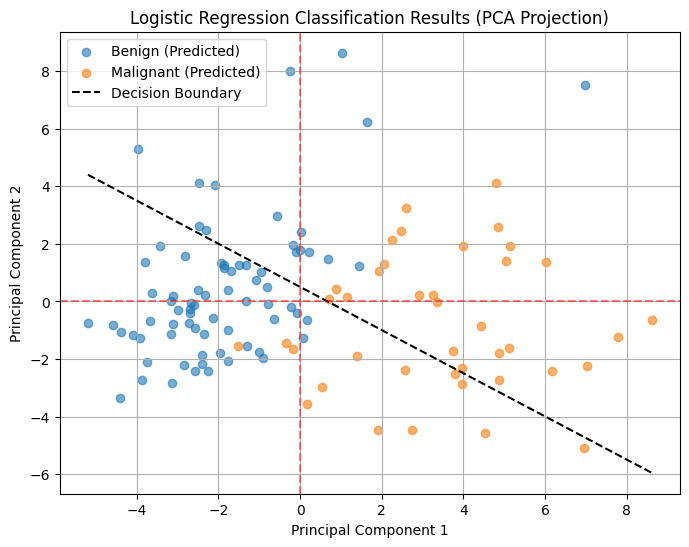

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[y_pred == 0, 0], X_reduced[y_pred == 0, 1], label='Benign (Predicted)', alpha=0.6)
plt.scatter(X_reduced[y_pred == 1, 0], X_reduced[y_pred == 1, 1], label='Malignant (Predicted)', alpha=0.6)

x_vals = np.linspace(min(X_reduced[:, 0]), max(X_reduced[:, 0]), 200)
y_vals = -(x_vals * model.coef_[0][0] / model.coef_[0][1]) - model.intercept_[0] / model.coef_[0][1]
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Decision Boundary')

plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Logistic Regression Classification Results (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
